### RNN Layer: SimpleRNN()
1. `return_sequences:Boolean->`Whether to return the last output in the output sequence, or the full sequence. Default: False.

In [35]:
# import dependency
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import seaborn as sns

In [36]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.13.0-rc1


In [37]:
layers = keras.layers
optimizers = keras.optimizers
losses = keras.losses
mnist = keras.datasets.mnist

In [38]:
BATCH_SIZE = 64
LEARNING_RATE = 0.001
EPOCHS = 5

In [39]:
history = {}
test_score = {}

In [40]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.reshape([-1,28,28]).astype("float32")/255.0, x_test.reshape([-1,28,28]).astype("float32")/255.0

In [41]:
def SimpleRnn():
    model = keras.Sequential()
    model.add(layers.Input(shape=(None, 28)))
    model.add(layers.SimpleRNN(512, return_sequences=True, activation="relu"))
    model.add(layers.SimpleRNN(512, activation="relu"))
    model.add(layers.Dense(10))

    model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
    metrics=['accuracy']
    )
    return model

In [42]:
simple_rnn_model=SimpleRnn()
print(simple_rnn_model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, None, 512)         276992    
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 806922 (3.08 MB)
Trainable params: 806922 (3.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [43]:
history['simple_rnn_model'] = simple_rnn_model.fit(
        x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2
    )

Epoch 1/5
938/938 - 56s - loss: 0.3240 - accuracy: 0.8999 - 56s/epoch - 60ms/step
Epoch 2/5
938/938 - 56s - loss: 0.1352 - accuracy: 0.9625 - 56s/epoch - 60ms/step
Epoch 3/5
938/938 - 56s - loss: 0.1157 - accuracy: 0.9680 - 56s/epoch - 60ms/step
Epoch 4/5
938/938 - 57s - loss: 0.1035 - accuracy: 0.9722 - 57s/epoch - 61ms/step
Epoch 5/5
938/938 - 468s - loss: 0.0992 - accuracy: 0.9731 - 468s/epoch - 499ms/step


In [44]:
test_score['simple_rnn_model'] = simple_rnn_model.evaluate(x=x_test, y=y_test, batch_size=BATCH_SIZE, verbose=2)

157/157 - 3s - loss: 0.1131 - accuracy: 0.9694 - 3s/epoch - 21ms/step


In [45]:
def LSTM():
    model = keras.Sequential()
    model.add(layers.Input(shape=(None, 28)))
    model.add(layers.LSTM(256, return_sequences=True, activation="tanh"))
    model.add(layers.LSTM(256, activation="tanh"))
    model.add(layers.Dense(10))

    model.compile(
        loss=losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
        metrics=['accuracy']
    )

    return model

In [46]:
lstm_model = LSTM()
print(lstm_model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 256)         291840    
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 819722 (3.13 MB)
Trainable params: 819722 (3.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [47]:
history['lstm_model'] = lstm_model.fit(
        x=x_train, y=y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2
    )
test_score['lstm_model'] = lstm_model.evaluate(x=x_test, y=y_test, batch_size=BATCH_SIZE, verbose=2)

Epoch 1/5
938/938 - 69s - loss: 0.2994 - accuracy: 0.9024 - 69s/epoch - 74ms/step
Epoch 2/5
938/938 - 69s - loss: 0.0862 - accuracy: 0.9739 - 69s/epoch - 73ms/step
Epoch 3/5
938/938 - 69s - loss: 0.0596 - accuracy: 0.9816 - 69s/epoch - 74ms/step
Epoch 4/5
938/938 - 68s - loss: 0.0448 - accuracy: 0.9865 - 68s/epoch - 72ms/step
Epoch 5/5
938/938 - 69s - loss: 0.0377 - accuracy: 0.9883 - 69s/epoch - 74ms/step
157/157 - 5s - loss: 0.0453 - accuracy: 0.9853 - 5s/epoch - 32ms/step


In [48]:
def LSTMBidirectional():
    model = keras.Sequential()
    model.add(layers.Input(shape=(None, 28)))
    model.add(layers.Bidirectional(layers.LSTM(256, return_sequences=True, activation="tanh")))
    model.add(layers.Bidirectional(layers.LSTM(256, activation="tanh")))
    model.add(layers.Dense(10))

    model.compile(
        loss=losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
        metrics=['accuracy']
    )

    return model

In [49]:
lstm_bidirectional_model = LSTMBidirectional()
print(lstm_bidirectional_model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, None, 512)         583680    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 512)               1574912   
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 2163722 (8.25 MB)
Trainable params: 2163722 (8.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [50]:
history["lstm_bidirectional_model"] = lstm_bidirectional_model.fit(
    x=x_train, y=y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2
)
test_score["lstm_bidirectional_model"] = lstm_bidirectional_model.evaluate(
    x=x_test, y=y_test, batch_size=BATCH_SIZE, verbose=2
)

Epoch 1/5
938/938 - 121s - loss: 0.2694 - accuracy: 0.9117 - 121s/epoch - 129ms/step
Epoch 2/5
938/938 - 133s - loss: 0.0766 - accuracy: 0.9765 - 133s/epoch - 142ms/step
Epoch 3/5
938/938 - 119s - loss: 0.0531 - accuracy: 0.9834 - 119s/epoch - 127ms/step
Epoch 4/5
938/938 - 120s - loss: 0.0399 - accuracy: 0.9876 - 120s/epoch - 128ms/step
Epoch 5/5
938/938 - 119s - loss: 0.0338 - accuracy: 0.9895 - 119s/epoch - 127ms/step
157/157 - 8s - loss: 0.0555 - accuracy: 0.9815 - 8s/epoch - 48ms/step


In [51]:
def GRU():
    model = keras.Sequential()
    model.add(layers.Input(shape=(None, 28)))
    model.add(layers.LSTM(256, return_sequences=True, activation="tanh"))
    model.add(layers.LSTM(256, activation="tanh"))
    model.add(layers.Dense(10))

    model.compile(
        loss=losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
        metrics=['accuracy']
    )

    return model

In [52]:
gru_model = GRU()
print(gru_model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, None, 256)         291840    
                                                                 
 lstm_5 (LSTM)               (None, 256)               525312    
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 819722 (3.13 MB)
Trainable params: 819722 (3.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [53]:
history["gru_model"] = gru_model.fit(
    x=x_train, y=y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2
)
test_score["gru_model"] = gru_model.evaluate(
    x=x_test, y=y_test, batch_size=BATCH_SIZE, verbose=2
)

Epoch 1/5
938/938 - 70s - loss: 0.3074 - accuracy: 0.8978 - 70s/epoch - 75ms/step
Epoch 2/5
938/938 - 69s - loss: 0.0891 - accuracy: 0.9726 - 69s/epoch - 74ms/step
Epoch 3/5
938/938 - 69s - loss: 0.0617 - accuracy: 0.9810 - 69s/epoch - 73ms/step
Epoch 4/5
938/938 - 69s - loss: 0.0471 - accuracy: 0.9858 - 69s/epoch - 73ms/step
Epoch 5/5
938/938 - 69s - loss: 0.0385 - accuracy: 0.9880 - 69s/epoch - 74ms/step
157/157 - 5s - loss: 0.0482 - accuracy: 0.9863 - 5s/epoch - 34ms/step


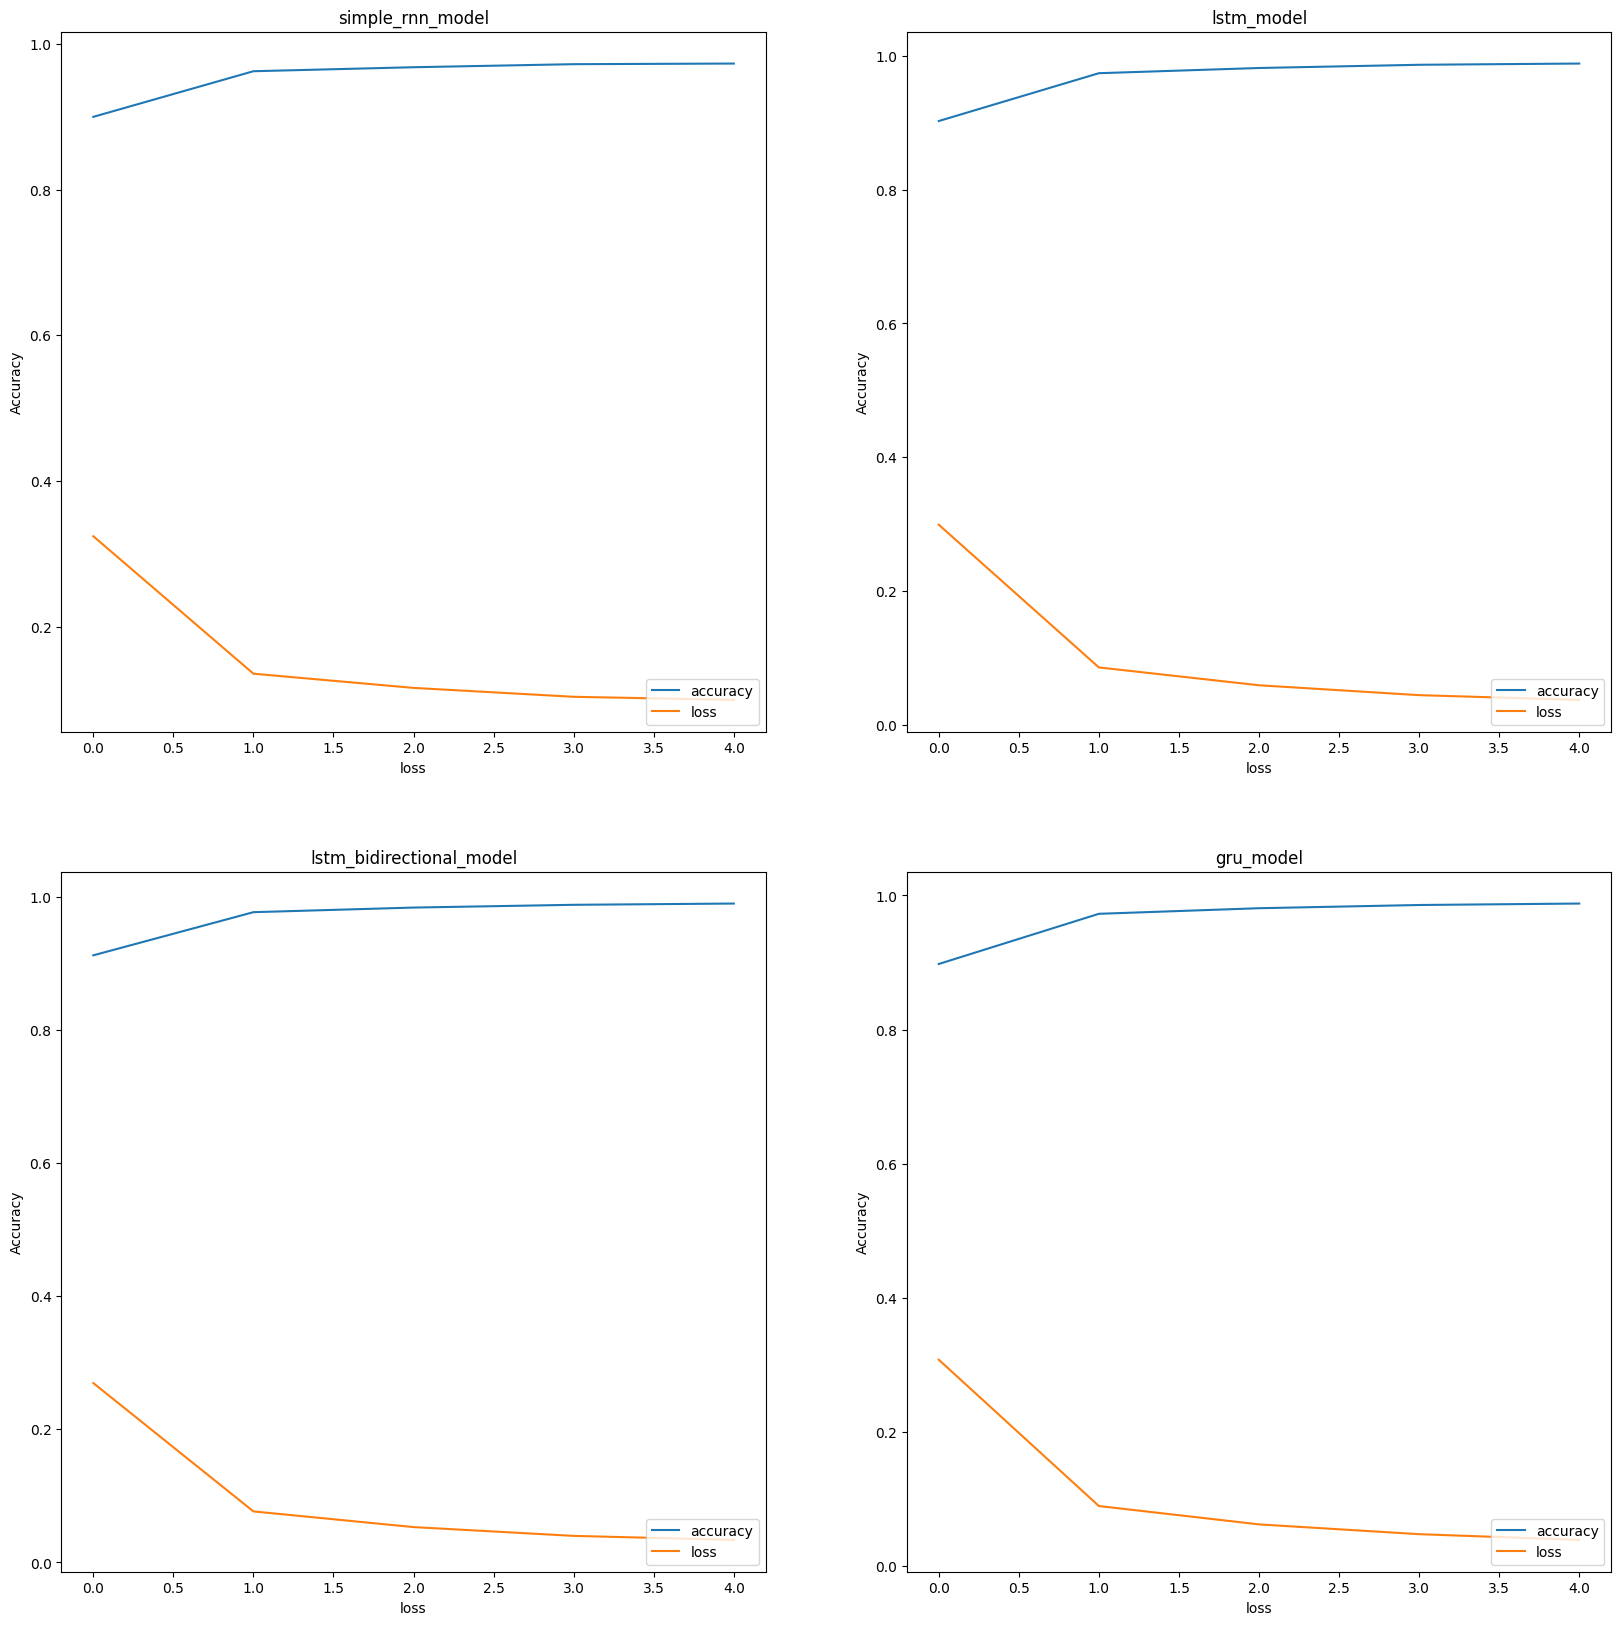

In [64]:
# visualize the model Accurecy
def plot_accurecy(history):
    plt.figure(figsize=(20,20))
    i=0
    for key, value in history.items():
        i = i+1
        # print(value.history['loss'])
        plt.subplot(2,2, i)
        plt.plot(value.history['accuracy'], label='accuracy')
        plt.plot(value.history['loss'], label='loss')
        plt.xlabel('loss')
        plt.ylabel('Accuracy')

        plt.legend(loc='lower right')
        plt.title(key)
plot_accurecy(history)

In [75]:
for key, value in test_score.items():
    print(key, value)

simple_rnn_model [0.11306139081716537, 0.9693999886512756]
lstm_model [0.0452774241566658, 0.9853000044822693]
lstm_bidirectional_model [0.05551518127322197, 0.9815000295639038]
gru_model [0.04819735884666443, 0.986299991607666]


In [77]:
pd.DataFrame.from_dict(test_score, orient='index', columns=["Error","Accuracy"])

,Error,Accuracy
simple_rnn_model,0.113061,0.9694
lstm_model,0.045277,0.9853
lstm_bidirectional_model,0.055515,0.9815
gru_model,0.048197,0.9863
